Code Credit:

University of California San Diego

Department of Electrical and Computer Engineering

Winter 19 ECE 143 Final Project

Member: Nikhil Mohan, Xuezhu Hong, Qi Ma, Changhan Ge

In [41]:
import numpy as np
import pandas as pd 
import seaborn as sns              
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 
from matplotlib.figure import Figure
from random import random

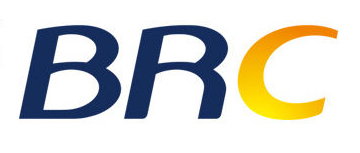

In [42]:
from IPython.display import Image
Image("BRC.jpg")

Ms. Jane Liu who served as HR at BRC, a Chinese Property & Tourism Investment Group, provided 838 samples of information of employees who submitted resignation letter in their culture & tourim branch in 2018. 10% of them withdrew their resignation and are still working in the company

For privacy protection purpose, names and citizen IDs are deleted when the dataset was released.

In [43]:
df = pd.read_csv('BRCLeavingListDataSet.csv', encoding= "ISO-8859-1")

# Data Preprocessing

In [44]:
def salary_mapping(df):
    '''
    This function is for mapping salary rank in BRC dataset to real salary
    The way we map salary is to normalize the salary rank and Gaussian distribute it to the range 2000-20000
    
    Param:
    input: df, pd.Dataframe
    return: df, pd.Dataframe
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    salary_pre=df['Salary Rank'].str.split(' ',expand=True)
    salary_pre.columns=('Rank','Salary Rank')
    salary_pre['Salary']=None
    for i in range(len(salary_pre)):
        if salary_pre['Rank'][i]=='M':
            salary_pre['Salary'][i]=np.sqrt(float(salary_pre['Salary Rank'][i])*(1+0.5*random())-1)
        else:
            salary_pre['Salary'][i]=np.cbrt(float(salary_pre['Salary Rank'][i])*(1+0.5*random())-1)
    salary=salary_pre['Salary']
    salary_nomalize=(salary-np.min(salary))/(np.max(salary)-np.min(salary)) #Normalization of Salary Rank
    salary_predicted=salary_nomalize*(20000-2000)+2000  #Gaussian distribute the Normalized salary rank to 2000-20000
    df['Salary']=salary_predicted.astype(float)
    return df

In [45]:
def Education_mapping(df):
    '''
    This function is to map the education level to a certain number
    
    Param:
    input: df, pd.Dataframe
    map_table: the mapping rule of education level to a certain number
    return: df, pd.Dataframe
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    Education=df['Highest Education Level']
    Education=Education.to_frame()
    Education['Quantitized Education Level']=None
    map_table={'Graduate Level (Master & Ph.d.)':5,'Bachelor':4,'Community College, Two-Year Program, or Equivalent ':3,'High School':2,'Under High School':1}
    for i in range(len(Education)):
        Education['Quantitized Education Level'][i]=map_table[Education['Highest Education Level'][i]]
    df['Quantitized Education Level']=Education['Quantitized Education Level']
    return df

In [46]:
def Split_department(df):
    '''
    This function is to split the department name from description
    
    Param: 
    input: df, pd.Dataframe
    return: df, pd.Dataframe
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    Department_pre=df['Description'].str.split('-',expand=True)
    Department_pre.columns=('Department','Jobrole')
    df['Department']=Department_pre['Department']
    df['Jobrole']=Department_pre['Jobrole']
    return df

In [47]:
#Data Prepocessing
df=salary_mapping(df) #Mapping salary rank to real salary
df=Education_mapping(df)  #Mapping Education Level to a certain number
df=Split_department(df)   #Split department from description

# Data Preview

In [102]:
df.head()

,Gender,Age,Branch,Administration Level,Entry Time,Years of Service,Highest Education Level,Status,Rank,Salary Rank,Description,Attrition,Salary,Quantitized Education Level,Department,Jobrole
0,Female,39,BRC Culture & Tourism,General Manager,3/8/10,9,Bachelor,Full-time,6,M 6.1,Management,Yes,17708.042771,4,Management,None
1,Male,42,BRC Culture & Tourism,Deputy General Manager,5/6/10,8,Graduate Level (Master & Ph.d.),Full-time,5,M 5.1,Human Resources,Yes,14839.973866,5,Human Resources,None
2,Male,27,BRC Culture & Tourism,Staff,7/1/14,1,Bachelor,Full-time,1,P 1.1,Human Resources,Yes,5596.189294,4,Human Resources,None
3,Male,39,BRC Culture & Tourism,General Manager,8/31/04,13,Bachelor,Full-time,6,M 6.1,Commercial Operation-Commercial Management,Yes,15883.379335,4,Commercial Operation,Commercial Management
4,Female,35,BRC Culture & Tourism,Assistant General Manager,3/18/14,3,Bachelor,Full-time,4,P 4.1,Commercial Operation-Planning,Yes,10564.330221,4,Commercial Operation,Planning


# Data Analysis

In [49]:
def BasicAttrition(df):
    '''
    Plot Basic Attrition Information
    input: df, pd.dataframe
    no return
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    Attrition = df['Attrition'].apply(lambda x: 'Left the Company' if x == 'Yes' else 'Currently Working in Company')
    figure1=sns.countplot(Attrition)
    plt.title('Attrition in the BRC')
    plt.xlabel('Attrition Status')
    plt.ylabel('Employee Number')
    plt.show()
    fig1=figure1.get_figure()
    fig1.savefig('Atrrition-in-CompanyBRC.jpg',dpi=300)
    print(Attrition.value_counts())

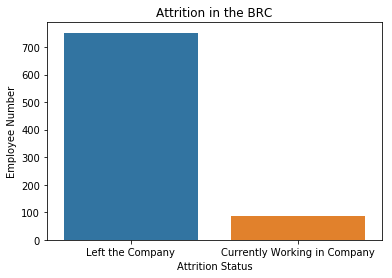

Left the Company                752
Currently Working in Company     86
Name: Attrition, dtype: int64


In [50]:
BasicAttrition(df)

In [109]:
def EducationRatio(df):
    '''
    Plot education level ratio in people who left company
    input: df, pd.dataframe
    no return
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    Edu_Left=df['Quantitized Education Level'][df['Attrition']=='No']
    temp=dict(Edu_Left.value_counts())

    labels=list(temp.keys())
    print(labels)
    datas=list(temp.values())
    #labels[-3]='Graduate Level\n(Master & Ph.d.)'
    #labels[1]='Community College,\n Two-Year Program,\n or Equivalent'
    print(labels)
    
    colors = ['slateblue','steelblue', 'cadetblue', 'lightskyblue', 'dodgerblue']
    plt.pie(datas,labels=labels,colors=colors,autopct='%1.2f%%')
    plt.title('BRC-Stay')
    plt.axis('equal')
    plt.savefig('PieEducation-BRC-stay.jpg',dpi=300)
    plt.show()
    print(Edu_Left.value_counts())

[4, 3, 5, 2, 1]
[4, 3, 5, 2, 1]


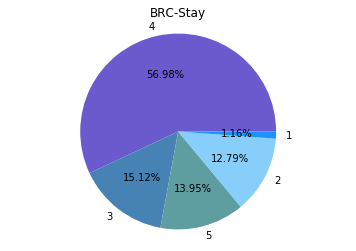

4    49
3    13
5    12
2    11
1     1
Name: Quantitized Education Level, dtype: int64


In [110]:
EducationRatio(df)

In [53]:
def GenderPie(df):
    '''
    Plot gender ratio in people who left company
    input: df, pd.dataframe
    no return
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    Gen_Left=df.Gender[df['Attrition']=='Yes']
    temp=dict(Gen_Left.value_counts())
    labels2=list(temp.keys())
    datas2=list(temp.values())
    fig = plt.figure()
    plt.pie(datas2,labels=labels2,autopct='%1.2f%%')
    plt.title('Pie Chart')
    plt.axis('equal')
    plt.savefig('GenderBRC.jpg')
    plt.show()  
    print(Gen_Left.value_counts())

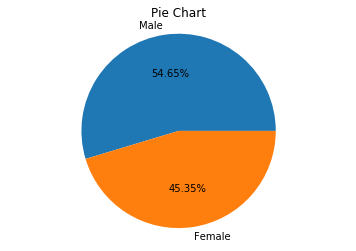

Male      411
Female    341
Name: Gender, dtype: int64


In [54]:
GenderPie(df)

In [73]:
def ViolinGender(df):
    '''
    Make Violin Plot on Gender ratio for Stay and leave
    input: df, pd.dataframe
    no return
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    sns.violinplot(x="Attrition", y="Years of Service", hue="Gender", data=df, palette="muted", split=True,
                   inner="quartile")
    plt.title('BRC')
    plt.savefig('ViolinBRC.jpg',dpi=300)
    plt.show()

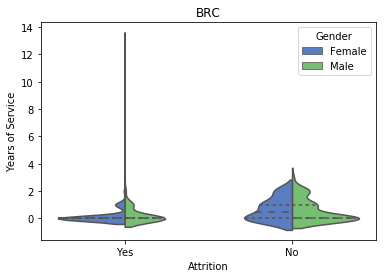

In [74]:
ViolinGender(df)

In [57]:
def AgeAttrition(df):
    '''
    Age ratio in Attrition
    input: df, pd.dataframe
    no return
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    sns.distplot(df.Age[df['Attrition']=='Yes'],label='Left')
    sns.distplot(df.Age[df['Attrition']=='No'],label='Stay')
    plt.legend()
    plt.savefig('Attrition-AgeBRC.jpg',dpi=300)
    plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


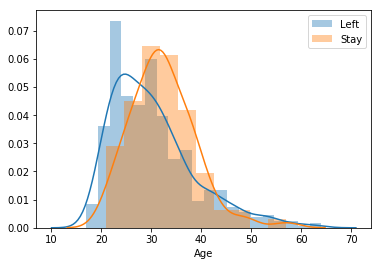

In [58]:
AgeAttrition(df)

In [59]:
def Jobrank(df):
    '''
    Department and Rank
    input: df, pd.dataframe
    no return
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    atr_yes = df[df['Attrition'] == 'Yes']
    sns.barplot(x = df['Rank'], y = atr_yes['Department'])

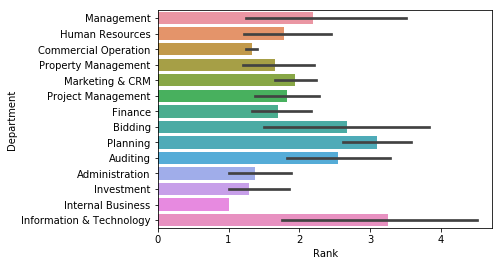

In [60]:
Jobrank(df)

In [63]:
def IncomeGender(df):
    '''
    Plot relationship between income and gender
    input: df, pd.dataframe
    no return
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    sns.distplot(df.Salary[df.Gender == 'Male'],bins = np.linspace(0, 20000,50))
    sns.distplot(df.Salary[df.Gender == 'Female'],bins = np.linspace(0, 20000,50))
    plt.title('BRC')
    plt.legend(['Males', 'Females'])
    plt.xlabel('Monthly Income')
    plt.savefig('Income-GenderIBM.jpg',dpi=300)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


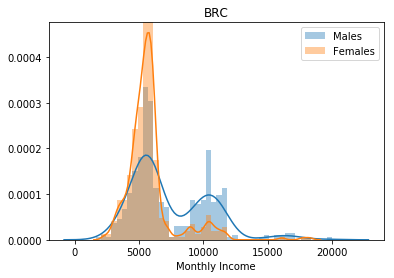

In [64]:
IncomeGender(df)

In [89]:
def incomeplotbydepartment(df):
    '''
    This function plot the relationship between department and income
    input: df, pd.dataframe
    no return
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    plt.figure(figsize = (12,18))
    # subplot of R&D
    plt.subplot(3,1,1)
    plt.title('Management')
    sns.distplot(df.Salary[(df.Department == 'Management') & (df.Gender == 'Male')])
    sns.distplot(df.Salary[(df.Department == 'Management') & (df.Gender == 'Female')])
    plt.xlabel('Salary')
    plt.legend(['Males', 'Females'])
    # subplot of Sales
    plt.subplot(3,1,2)
    plt.title('Marketing & CRM')
    sns.distplot(df.Salary[(df.Department == 'Marketing & CRM') & (df.Gender == 'Male')])
    sns.distplot(df.Salary[(df.Department == 'Marketing & CRM') & (df.Gender == 'Female')])
    plt.xlabel('Salary')
    plt.legend(['Males', 'Females'])
    # subplot of HR
    plt.subplot(3,1,3)
    plt.title('Human Resources')
    sns.distplot(df.Salary[(df.Department == 'Human Resources') & (df.Gender == 'Male')])
    sns.distplot(df.Salary[(df.Department == 'Human Resources') & (df.Gender == 'Female')])
    plt.xlabel('Salary')
    plt.legend(['Males', 'Females'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

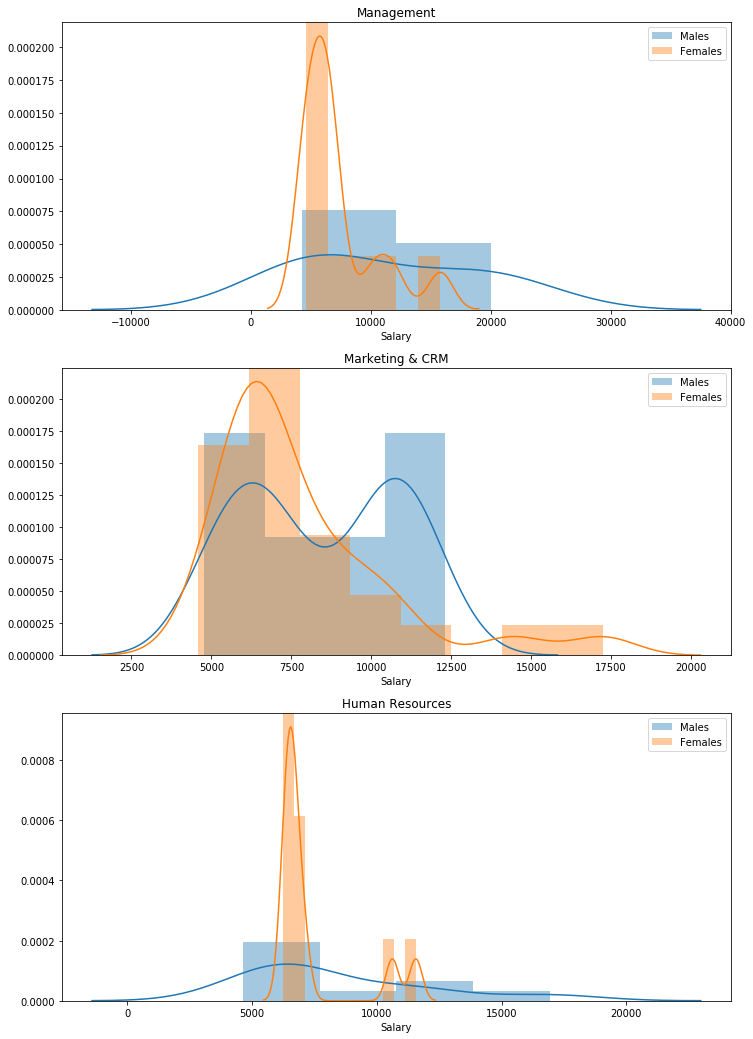

In [90]:
incomeplotbydepartment(df)

In [91]:
def boxfigure(df):
    '''
    This function plots boxfigure for different elements
    input: df, pd.dataframe
    no return
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    fig,ax = plt.subplots(2,2,figsize=(20, 20))
    sns.boxplot(df['Attrition'],df['Salary'],ax = ax[0,0])
    sns.boxplot(df['Gender'],df['Salary'],ax = ax[0,1])
    sns.boxplot(df['Highest Education Level'],df['Salary'],ax = ax[1,0])
    sns.boxplot(df['Department'],df['Salary'],ax = ax[1,1])
    plt.xticks(rotation = 90)
    plt.show()

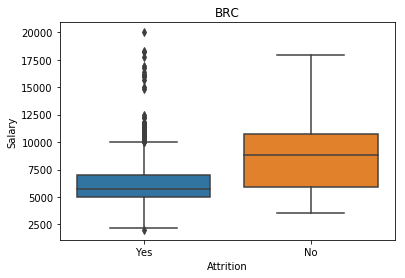

In [99]:
sns.boxplot(df['Attrition'],df['Salary'])
plt.title('BRC')
plt.savefig('Salary-BRC.jpg',dpi=300)

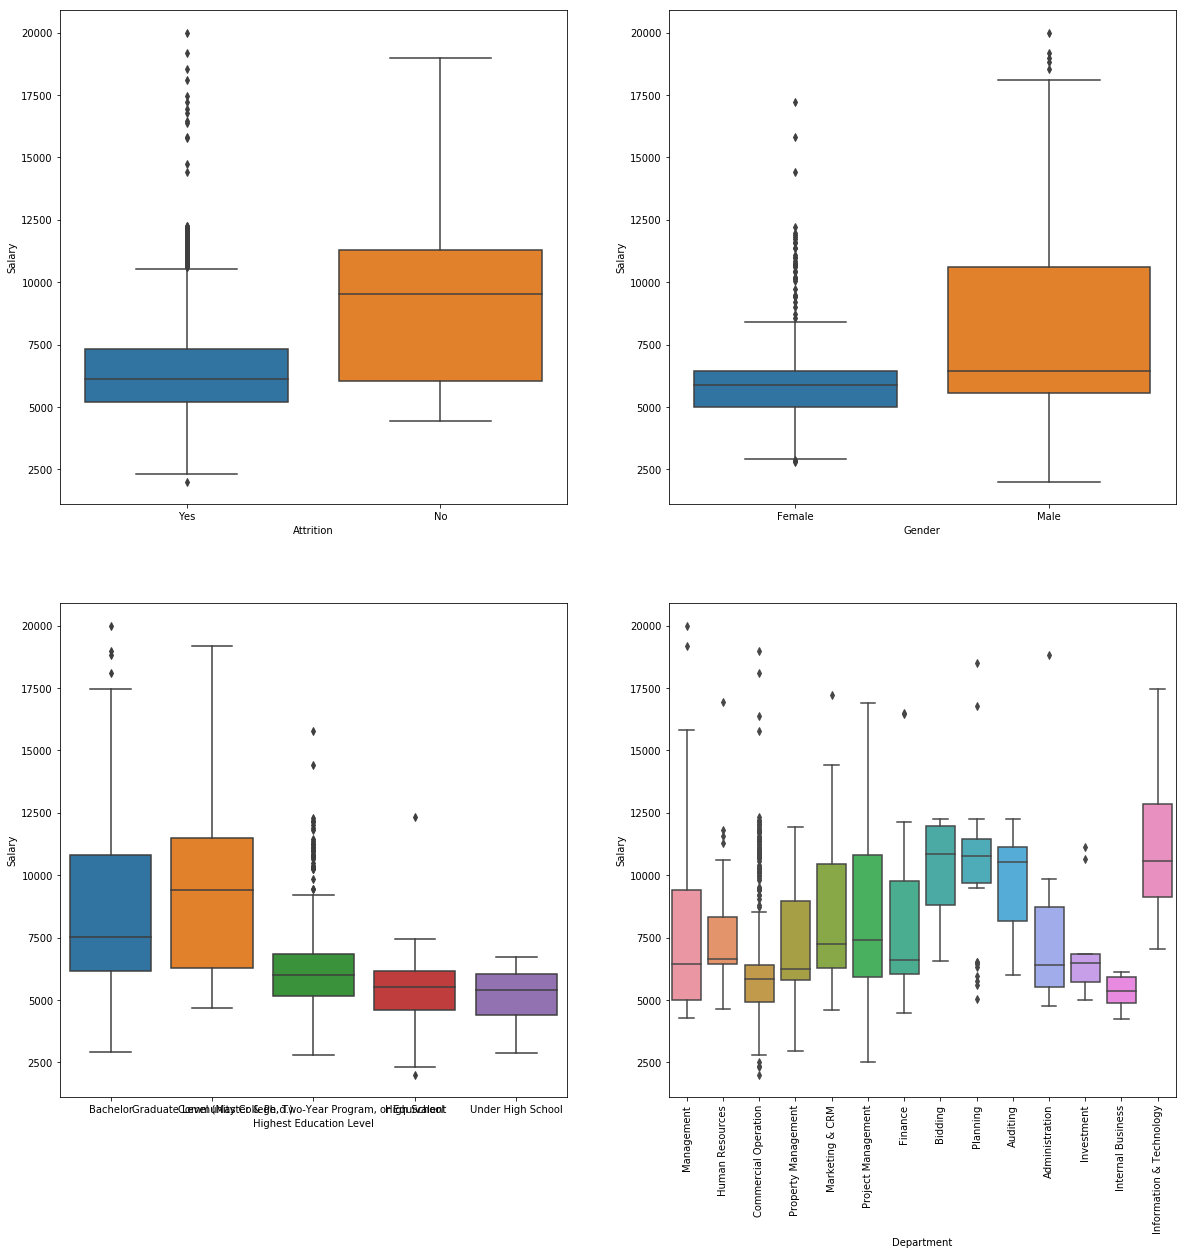

In [92]:
boxfigure(df)

In [93]:
def swarmplotwithrank(df):
    '''
    This function plot swarmplot of rank and attrition
    input: df, pd.Dataframe
    no return
    '''
    assert isinstance(df,pd.core.frame.DataFrame)
    sns.swarmplot(x = 'Rank', y = 'Salary', hue = 'Attrition',data = df)
    plt.show()

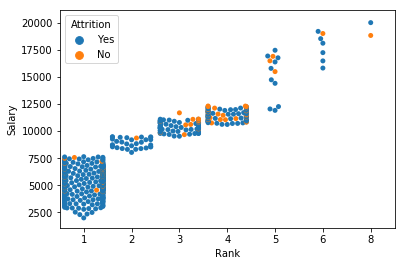

In [94]:
swarmplotwithrank(df)

In [75]:
from ggplot import *

/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [95]:
def ggplotAgeDepartmentSalary(df):
    '''
    This function plot ggplot for age, department and Salary
    input: df, pd.Dataframe
    no return
    '''
    figure=ggplot(aes(x='Age',y='Salary',color = 'Department'), data = df) + \
    geom_point() +\
    theme_bw() + \
    ggtitle('Monthly Income by Age - BRC')
    return figure

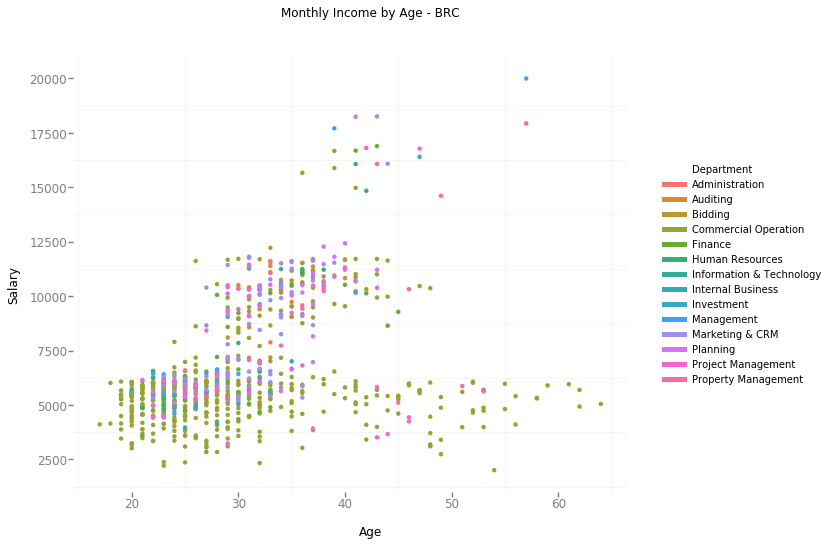

<ggplot: (7001866160)>

In [96]:
ggplotAgeDepartmentSalary(df)